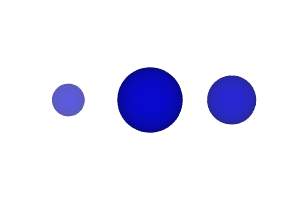

In [1]:
from fdray import *
from fdray.data import from_field


def get_object(x):
    return Sphere(0, x, Color("blue", alpha=2 * x))


Scene(
    Camera(-90, 0, view_scale=1.5, look_at=(1, 0, 0)),
    LightSource(0, "white"),
    from_field([0.2, 0.4, 0.3], get_object, ndim=0),
).render(300, 200)

In [121]:
from math import degrees

axes = Union(
    Cylinder((0, 0, 0), (0.7, 0, 0), 0.02, Color("red")),
    Cylinder((0, 0, 0), (0, 0.7, 0), 0.02, Color("green")),
    Cylinder((0, 0, 0), (0, 0, 0.7), 0.02, Color("blue")),
)


def get_object(x):
    phi, theta = Vector(x).to_spherical()

    h = Cone((-0.1, 0, 0), 0.2, (0.6, 0, 0), 0.02)
    t = Cylinder((-0.3, 0, 0), (0, 0, 0), 0.1)
    c = h | t

    c = (
        c.pigment(Color("yellow", alpha=0.5))
        .finish(specular=0.3)
        .rotate(0, -degrees(theta), degrees(phi))
    ) + axes
    print(c)
    return c


f = [[1, 0, 0], [0, 1, 0], [0, -1, 0], [0, 0, 1], [0, 0, -1], [1, 1, 1], [1, -1, -1]]

Scene(
    Camera(-70, 10, view_scale=1.7, look_at=(3, 0, 0), distance=150),
    LightSource((0.4, 30, 40), "white"),
    from_field(f, get_object, ndim=1),
).render(800, 200)

merge { cone { <-0.1, 0, 0>, 0.2, <0.6, 0, 0>, 0.02 } cylinder { <-0.3, 0, 0>, <0, 0, 0>, 0.1 } pigment { rgbt <1, 1, 0, 0.5> } finish { specular 0.3 } rotate <0, 0, 0> union { cylinder { <0, 0, 0>, <0.7, 0, 0>, 0.02 pigment { rgb <1, 0, 0> } } cylinder { <0, 0, 0>, <0, 0.7, 0>, 0.02 pigment { rgb <0, 0.502, 0> } } cylinder { <0, 0, 0>, <0, 0, 0.7>, 0.02 pigment { rgb <0, 0, 1> } } } }
merge { cone { <-0.1, 0, 0>, 0.2, <0.6, 0, 0>, 0.02 } cylinder { <-0.3, 0, 0>, <0, 0, 0>, 0.1 } pigment { rgbt <1, 1, 0, 0.5> } finish { specular 0.3 } rotate <0, 0, 90> union { cylinder { <0, 0, 0>, <0.7, 0, 0>, 0.02 pigment { rgb <1, 0, 0> } } cylinder { <0, 0, 0>, <0, 0.7, 0>, 0.02 pigment { rgb <0, 0.502, 0> } } cylinder { <0, 0, 0>, <0, 0, 0.7>, 0.02 pigment { rgb <0, 0, 1> } } } }
merge { cone { <-0.1, 0, 0>, 0.2, <0.6, 0, 0>, 0.02 } cylinder { <-0.3, 0, 0>, <0, 0, 0>, 0.1 } pigment { rgbt <1, 1, 0, 0.5> } finish { specular 0.3 } rotate <0, 0, -90> union { cylinder { <0, 0, 0>, <0.7, 0, 0>, 0.02 pi

RenderError: POV-Ray rendering failed:
==== [Parsing...] ==========================================================
File '/tmp/tmp9yebml5m/scene.pov' line 5: Parse Error: No matching } in 'merge',
 union found instead
Fatal error in parser: Cannot parse input.
Render failed
